<a href="https://colab.research.google.com/github/MrA-png/Final-Test-Clustering-for-Prediction/blob/main/Final_Test_Clustering_for_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Baca dataset
dataset = pd.read_csv('transaction.csv')
print("Dataset:\n", dataset.head())



Dataset:
    InvoiceNo  StockCode  Qty      InvoiceDate  CustomerID  Country
0     537626      22725  830  12/7/2010 14:57       12347  Iceland
1     537626      22729  948  12/7/2010 14:57       12347  Iceland
2     537626      22195  695  12/7/2010 14:57       12347  Iceland
3     542237      22725  636  1/26/2011 14:30       12347  Iceland
4     542237      22729  536  1/26/2011 14:30       12347  Iceland


In [5]:

# 2. Ambil data dengan fitur InvoiceNo, Country, month, year (2011)
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['Month'] = dataset['InvoiceDate'].dt.month
dataset['Year'] = dataset['InvoiceDate'].dt.year
data = dataset[(dataset['Year'] == 2011)][['InvoiceNo', 'Country', 'Month', 'Year']]
print("Filtered Data (2011):\n", data.head())

# Menyimpan hasil transaksi tinggi setiap bulan
transaksi_tinggi_list = []



Filtered Data (2011):
    InvoiceNo  Country  Month  Year
3     542237  Iceland      1  2011
4     542237  Iceland      1  2011
5     542237  Iceland      1  2011
6     542237  Iceland      1  2011
7     542237  Iceland      1  2011


In [6]:
# 3. Proses iteratif untuk setiap bulan
for i in range(1, 13):
    # Ambil data bulan ke-i
    data_bulan = data[data['Month'] == i]
    print(f"Data Bulan ke-{i}:\n", data_bulan.head())

    # 4. Hitung banyaknya transaksi per negara
    transaksi = data_bulan.groupby('Country')['InvoiceNo'].nunique().reset_index()
    transaksi.columns = ['Country', 'Transactions']
    print(f"Transaksi per Negara di Bulan ke-{i}:\n", transaksi)

    # 5. Clustering dengan Average Linkage (k=3)
    clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
    transaksi['Cluster'] = clustering.fit_predict(transaksi[['Transactions']])
    print(f"Clustering Result:\n", transaksi)

    # 6. Tentukan posisi centroid dari setiap cluster
    centroids = transaksi.groupby('Cluster')['Transactions'].mean().reset_index()
    centroids.columns = ['Cluster', 'Centroid']
    print(f"Centroids:\n", centroids)

    # 7. Urutkan posisi centroid secara ascending
    sorted_centroids = centroids.sort_values('Centroid').reset_index(drop=True)
    print(f"Sorted Centroids:\n", sorted_centroids)

    # 8. Ambil nilai transaksi tinggi (cluster dengan centroid tertinggi)
    transaksi_tinggi = sorted_centroids.iloc[-1]['Centroid']
    print(f"Transaksi Tinggi Bulan ke-{i}: {transaksi_tinggi}")
    transaksi_tinggi_list.append(transaksi_tinggi)


Data Bulan ke-1:
    InvoiceNo  Country  Month  Year
3     542237  Iceland      1  2011
4     542237  Iceland      1  2011
5     542237  Iceland      1  2011
6     542237  Iceland      1  2011
7     542237  Iceland      1  2011
Transaksi per Negara di Bulan ke-1:
             Country  Transactions
0         Australia             5
1           Belgium             3
2   Channel Islands             1
3            Cyprus             1
4              EIRE             7
5           Finland             1
6            France            26
7           Germany            28
8            Greece             1
9           Iceland             1
10            Italy             3
11          Lebanon             1
12      Netherlands             4
13           Poland             1
14         Portugal             4
15        Singapore             1
16            Spain             7
17           Sweden             2
18      Switzerland             3
Clustering Result:
             Country  Transactions  

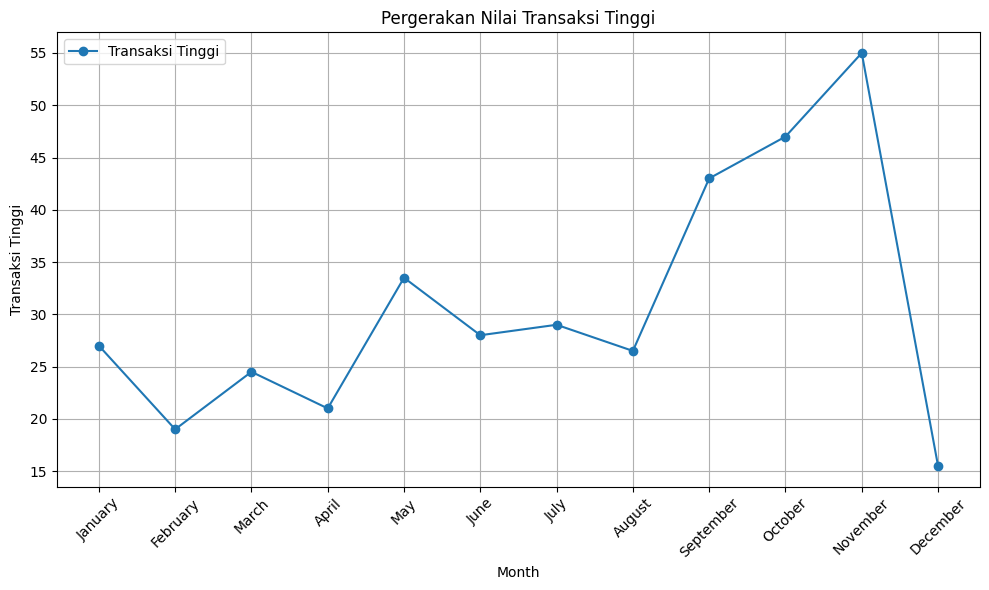

In [7]:
import calendar

# Mengonversi angka bulan menjadi nama bulan
months = list(range(1, 13))
month_names = [calendar.month_name[m] for m in months]  # Mengambil nama bulan

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(months, transaksi_tinggi_list, marker='o', label="Transaksi Tinggi")
plt.xticks(months, month_names, rotation=45)  # Menampilkan nama bulan di sumbu x
plt.xlabel("Month")
plt.ylabel("Transaksi Tinggi")
plt.title("Pergerakan Nilai Transaksi Tinggi")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Prediksi Transaksi Tinggi untuk Januari 2012: 40.86363636363636


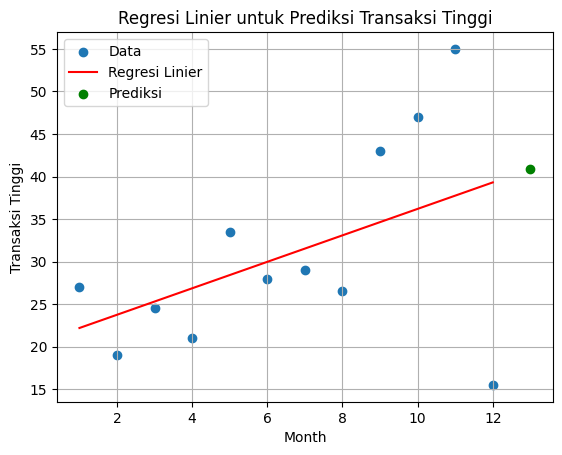

In [8]:
# 10. Prediksi nilai transaksi tinggi untuk Januari 2012
x = np.array(months).reshape(-1, 1)
y = np.array(transaksi_tinggi_list).reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(x, y)

next_month = np.array([[13]])  # Januari 2012 (bulan ke-13)
predicted_val = linreg.predict(next_month)[0][0]
print(f"Prediksi Transaksi Tinggi untuk Januari 2012: {predicted_val}")

# Visualisasi regresi linier
plt.scatter(x, y, label="Data")
plt.plot(x, linreg.predict(x), color='red', label="Regresi Linier")
plt.scatter(next_month, predicted_val, color='green', label="Prediksi")
plt.xlabel("Month")
plt.ylabel("Transaksi Tinggi")
plt.legend()
plt.title("Regresi Linier untuk Prediksi Transaksi Tinggi")
plt.grid(True)
plt.show()

Prediksi Transaksi Tinggi untuk Januari 2012: 40.86363636363636


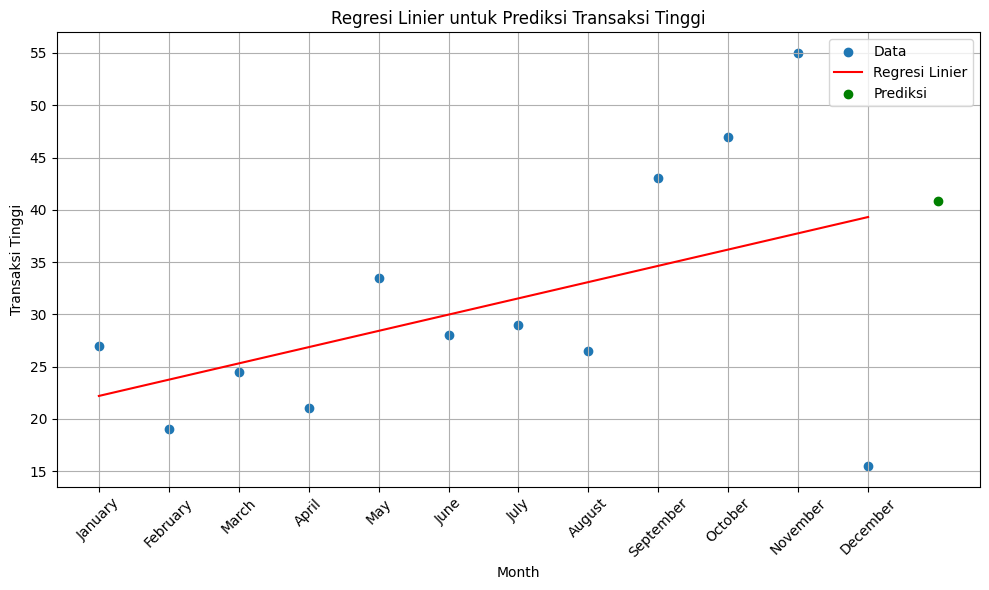

In [9]:
import calendar

# Prediksi menggunakan regresi linier
x = np.array(months).reshape(-1, 1)
y = np.array(transaksi_tinggi_list).reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(x, y)

# Prediksi untuk Januari 2012 (bulan ke-13)
next_month = np.array([[13]])  # Januari 2012 (bulan ke-13)
predicted_val = linreg.predict(next_month)[0][0]
print(f"Prediksi Transaksi Tinggi untuk Januari 2012: {predicted_val}")

# Konversi angka bulan menjadi nama bulan
month_names = [calendar.month_name[m] for m in months]  # Mengambil nama bulan

# Visualisasi regresi linier
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data")  # Data asli
plt.plot(x, linreg.predict(x), color='red', label="Regresi Linier")  # Garis regresi linier
plt.scatter(next_month, predicted_val, color='green', label="Prediksi")  # Titik prediksi

# Menyesuaikan sumbu x dengan nama bulan
plt.xticks(months, month_names, rotation=45)  # Menampilkan nama bulan di sumbu x
plt.xlabel("Month")
plt.ylabel("Transaksi Tinggi")
plt.legend()
plt.title("Regresi Linier untuk Prediksi Transaksi Tinggi")
plt.grid(True)
plt.tight_layout()
plt.show()


Prediksi Transaksi Tinggi untuk Januari 2012: 40.86363636363636


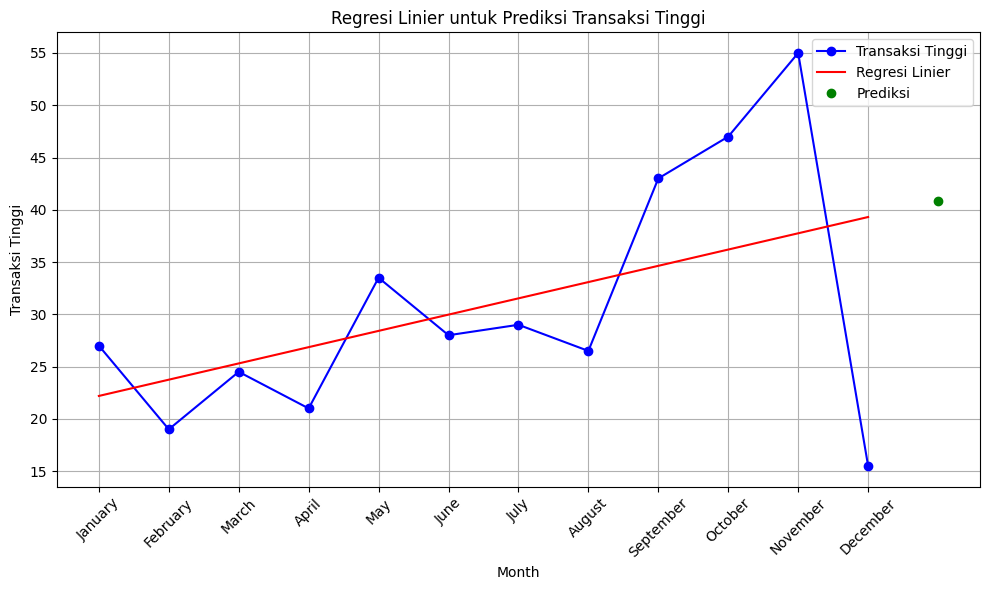

In [12]:
import calendar
# Prediksi menggunakan regresi linier
x = np.array(months).reshape(-1, 1)
y = np.array(transaksi_tinggi_list).reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(x, y)

# Prediksi untuk Januari 2012 (bulan ke-13)
next_month = np.array([[13]])  # Januari 2012 (bulan ke-13)
predicted_val = linreg.predict(next_month)[0][0]
print(f"Prediksi Transaksi Tinggi untuk Januari 2012: {predicted_val}")

# Konversi angka bulan menjadi nama bulan
month_names = [calendar.month_name[m] for m in months]  # Mengambil nama bulan

# Visualisasi regresi linier
plt.figure(figsize=(10, 6))
plt.plot(months, transaksi_tinggi_list, marker='o', label="Transaksi Tinggi", color='blue')
plt.plot(months, linreg.predict(x), color='red', label="Regresi Linier")
plt.plot(13, predicted_val, 'go', label="Prediksi")

# Menyesuaikan sumbu x dengan nama bulan
plt.xticks(months, month_names, rotation=45)  # Menampilkan nama bulan di sumbu x
plt.xlabel("Month")
plt.ylabel("Transaksi Tinggi")
plt.legend()
plt.title("Regresi Linier untuk Prediksi Transaksi Tinggi")
plt.grid(True)
plt.tight_layout()
plt.show()
